### Importing relevant packages

In [346]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize


In [347]:
def Q(x):
    x1,x2= x
    
    return (x1**2) + (x2**2)- (2*x1*x2)
    

In [348]:
Q([1,2])

1

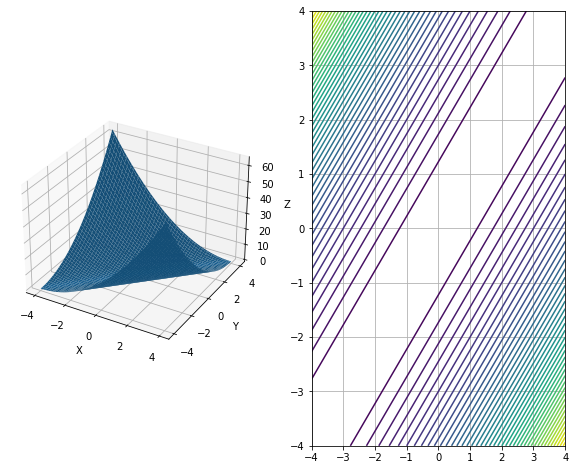

In [349]:
x1=np.linspace(-4,4,100)
x2=np.linspace(-4,4,100)


X,Y = np.meshgrid(x1,x2)
Z=Q([X,Y])

fig = plt.figure(figsize=(10,8))

ax1= fig.add_subplot(121,projection='3d')
ax1.plot_surface(X,Y,Z)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")



ax2= fig.add_subplot(122)
ax2.grid()
ax2.contour(X,Y,Z,levels=50)


plt.show()



### Defining powell optimizer

In [350]:
def powell(f,x0):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="Powell",callback=store, options={"ftol": 1e-12})
    return all_x_i, all_y_i,all_f_i


### Defining the function to be minimized

In [351]:
def f(x):
    x1,x2 = x
    
    return (x1**2+x2-11)**2 + (x1+x2**2-7)**2

### Setting initial guess

In [352]:
x0= [4,-4]

### Printing optimization results

In [353]:
sol1=optimize.minimize(f, x0, method="Powell", options={"ftol": 1e-12})

In [354]:
print("x values equals: ",sol1.x,"\nminimum function value equals",sol1.fun)

x values equals:  [ 3.58442834 -1.84812653] 
minimum function value equals 1.5461673742331831e-28


### Tracing optimization path

In [355]:
powell(f,x0)

([4,
  3.643679083088121,
  3.5861590022917813,
  3.584478933561255,
  3.584428340844927,
  3.584428340331089,
  3.584428340330492],
 [-4,
  -1.8601227095431359,
  -1.8475813129825531,
  -1.8481098148287203,
  -1.8481265309316046,
  -1.848126526968351,
  -1.8481265269644067],
 [170,
  0.18404557187214765,
  0.0001679148338226279,
  1.4407715262103452e-07,
  2.3045619016013334e-16,
  2.3078353289725766e-22,
  1.5461673742331831e-28])

In [356]:
x,y,z= np.squeeze((powell(f,x0)))

### Visualizing optimization process

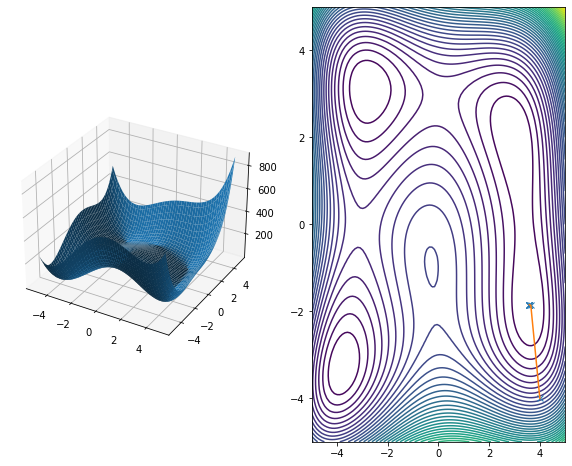

In [357]:
# Initializing some points to draw
x1= np.linspace(-5,5,100)
x2= np.linspace(-5,5,100)

# Creating the mesh
X,Y = np.meshgrid(x1,x2)
Z=f([X,Y])


# Plotting 3d function
fig= plt.figure(figsize=(10,8))
ax1= fig.add_subplot(121,projection='3d')
ax1.plot_surface(X,Y,Z)


# Plotting contour
ax2= fig.add_subplot(122)
ax2.plot(x,y,'x')
plt.plot(x,y)
ax2.contour(X,Y,Z,levels=50)

plt.show()

### Defining Conjugate Gradient optimizer

In [358]:
def conjugate_gradient(f,f_prime,x0, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, jac=f_prime, method="CG", callback=store, options={"gtol": 1e-12})
    return all_x_i, all_y_i,all_f_i


### Defining the function to be minimized 

In [359]:
def f(x):
    x1,x2 = x
    
    return (x1**2+x2-11)**2 + (x1+x2**2-7)**2

### Defining the jacobian matrix

In [360]:
def f_prime(x):
    
    x1,x2 = x
    
    f1 = 4*x1*(x1**2+x2-11) + 2*(x1+x2**2-7)
    
    f2 = 2*(x1**2+x2-11) + 4*x2*(x1+x2**2-7)
    
    return np.array([f1,f2])

    

### Setting initial guess

In [361]:
x0= [4,-4]

### Printing optimization results

In [362]:
sol2=optimize.minimize(f,x0,jac=f_prime, method="CG", options={"gtol": 1e-12})

In [363]:
print("x values equals: ",sol2.x,"\nminimum function value equals",sol2.fun)

x values equals:  [3. 2.] 
minimum function value equals 1.262177448353619e-29


### Tracing optimization path

In [364]:
conjugate_gradient(f,f_prime,x0)

([4,
  3.7982286361796636,
  2.8465268458553683,
  3.247019449067921,
  3.118236472173302,
  2.9895066498191367,
  2.9772090383725187,
  3.0000569058970514,
  2.999933834019195,
  2.999999339117151,
  3.0000006211111137,
  2.9999999999781726,
  3.000000000000433,
  3.0000000000000004],
 [-4,
  -3.0103595012621596,
  0.6677764309793641,
  1.01877027610984,
  1.982453864307638,
  2.0681669444153106,
  2.022496251080571,
  2.000566995481792,
  2.0000648409464623,
  1.9999976621911721,
  1.9999989045378026,
  1.9999999999776634,
  1.999999999999236,
  2.0],
 [170,
  34.518584620287115,
  18.716618716727897,
  7.6874389647787815,
  0.5005665073423494,
  0.07122180130932099,
  0.01751784033318033,
  6.231850844826431e-06,
  1.4765101122706133e-07,
  1.399715393575126e-10,
  2.1066377909829595e-11,
  3.586026693145227e-20,
  1.0244314953711966e-23,
  1.262177448353619e-29])

In [365]:
x,y,z= np.squeeze((conjugate_gradient(f,f_prime,x0)))

### Visualizing optimization process

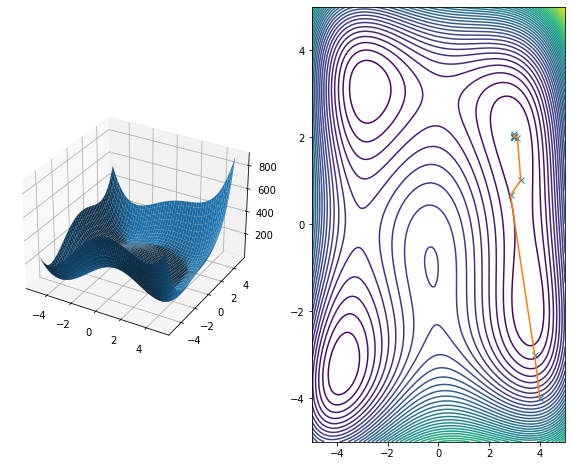

In [366]:
# Initializing some points to draw
x1= np.linspace(-5,5,100)
x2= np.linspace(-5,5,100)

# Creating the mesh
X,Y = np.meshgrid(x1,x2)
Z=f([X,Y])


# Plotting 3d function
fig= plt.figure(figsize=(10,8))
ax1= fig.add_subplot(121,projection='3d')
ax1.plot_surface(X,Y,Z)


# Plotting contour
ax2= fig.add_subplot(122)
ax2.plot(x,y,'x')
plt.plot(x,y)
ax2.contour(X,Y,Z,levels=50)

plt.show()

### Defining BFGS optimizer

In [367]:
def bfgs(f, f_prime,x0, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="BFGS", jac=f_prime, callback=store, options={"gtol": 1e-12})
    return all_x_i, all_y_i, all_f_i

### Defining the function to be minimized

In [368]:
def f(x):
    x1,x2 = x
    
    return (x1**2+x2-11)**2 + (x1+x2**2-7)**2

### Defining the jacobian matrix

In [369]:
def f_prime(x):
    
    x1,x2 = x
    
    f1 = 4*x1*(x1**2+x2-11) + 2*(x1+x2**2-7)
    
    f2 = 2*(x1**2+x2-11) + 4*x2*(x1+x2**2-7)
    
    return np.array([f1,f2])

    

### Setting initial guess

In [370]:
x0= [4,-4]

### Printing optimization results

In [371]:
sol3=optimize.minimize(f,x0,jac=f_prime, method="BFGS", options={"gtol": 1e-12})

In [372]:
print("x values equals: ",sol3.x,"\nminimum function value equals",sol3.fun)

x values equals:  [ 3.58442834 -1.84812653] 
minimum function value equals 0.0


### Tracing optimization path

In [373]:
bfgs(f,f_prime,x0)

([4,
  3.7982286361796636,
  3.691771537251805,
  3.683004460592085,
  3.6637904138087234,
  3.619455716275436,
  3.597917138062984,
  3.5878186545454964,
  3.584830394224504,
  3.5844418506805105,
  3.5844285110938534,
  3.584428350330389,
  3.5844283407993354,
  3.5844283403298425,
  3.5844283403304686,
  3.5844283403304917],
 [-4,
  -3.0103595012621596,
  -3.0191511092281647,
  -2.9280421317282173,
  -2.7314444893923735,
  -2.2638933786478863,
  -2.0090015601413564,
  -1.8869342961243276,
  -1.8524906082213433,
  -1.8482558966169524,
  -1.8481269573277577,
  -1.848126525648211,
  -1.8481265264019233,
  -1.8481265269570206,
  -1.8481265269643403,
  -1.8481265269644036],
 [170,
  34.518584620287115,
  33.87385088057886,
  27.76225785250238,
  17.107071261169498,
  3.0705803048733507,
  0.4060567977251669,
  0.02221467077088104,
  0.0002761589599074144,
  2.4283605415724966e-07,
  3.733007917642416e-12,
  5.355954910819585e-15,
  1.7987095345427057e-17,
  7.880066635239661e-22,
  7.650

### Visualizing optimization process

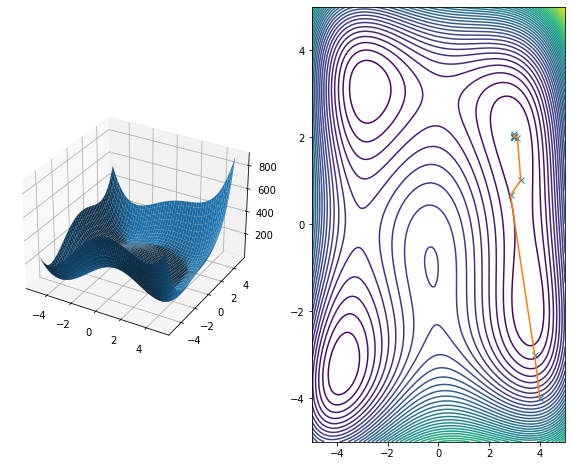

In [374]:
# Initializing some points to draw
x1= np.linspace(-5,5,100)
x2= np.linspace(-5,5,100)

# Creating the mesh
X,Y = np.meshgrid(x1,x2)
Z=f([X,Y])


# Plotting 3d function
fig= plt.figure(figsize=(10,8))
ax1= fig.add_subplot(121,projection='3d')
ax1.plot_surface(X,Y,Z)


# Plotting contour
ax2= fig.add_subplot(122)
ax2.plot(x,y,'x')
plt.plot(x,y)
ax2.contour(X,Y,Z,levels=50)

plt.show()

### Quick comparison

In [375]:
import pandas as pd

a1=[]
a1.extend(list(sol1.x))
a1.append(sol1.fun)

a2=[]
a2.extend(list(sol2.x))
a2.append(sol2.fun)

a3=[]
a3.extend(list(sol3.x))
a3.append(sol3.fun)

result= np.array([a1,a2,a3]).T

table = pd.DataFrame(data=result,columns=["Powell","Conjugate Gragient","BFGS"],index=["x","y","minimum function value"])
table

,Powell,Conjugate Gragient,BFGS
x,3.584428e+00,3.000000e+00,3.584428
y,-1.848127e+00,2.000000e+00,-1.848127
minimum function value,1.546167e-28,1.262177e-29,0.000000
